## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator 
from google.colab import drive
import matplotlib.pyplot as plt
import glob 
from numpy import asarray
from PIL import Image
import os 
import cv2
from PIL import Image
from skimage.transform import resize 
import skimage
from skimage import io 
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

## Importing the dataset

In [ ]:
drive.mount('/content/drive')
train_set = '/content/drive/MyDrive/Final_data/train'
test_set = '/content/drive/MyDrive/Final_data/test'
validation_set = '/content/drive/MyDrive/Final_data/validation'

Mounted at /content/drive


## Image preprocessing

In [ ]:
class_names_train = os.listdir((train_set))
class_names_train


['class0', 'class1']

In [ ]:
img_path_train_class0 = os.path.join(train_set, class_names_train[0], '*')
img_path_train_class0 = glob.glob(img_path_train_class0)
mg_path_train_class1 = os.path.join(train_set, class_names_train[1], '*')
img_path_train_class1 = glob.glob(mg_path_train_class1)

In [ ]:
class_names_test = os.listdir((test_set))
class_names_test

['class0', 'class1']

In [ ]:
img_path_test_class0 = os.path.join(test_set, class_names_test[1], '*')
img_path_test_class0 = glob.glob(img_path_test_class0)
mg_path_test_class1 = os.path.join(test_set, class_names_test[0], '*')
img_path_test_class1 = glob.glob(mg_path_test_class1)

In [ ]:
class_names_validation = os.listdir((validation_set))
class_names_validation

['class1', 'class0']

In [ ]:
img_path_validation_class0 = os.path.join(validation_set, class_names_validation[0], '*')
img_path_validation_class0 = glob.glob(img_path_validation_class0)
mg_path_validation_class1 = os.path.join(validation_set, class_names_validation[1], '*')
img_path_validation_class1 = glob.glob(mg_path_validation_class1)

In [ ]:
image = io.imread(img_path_train_class0[1]) 
print(image.shape)

(500, 500, 3)


In [ ]:
def image_preprocess (image_path,folder_path):
  # dsize = (500,300)
  c =1
  for img in image_path:
    pic = cv2.imread(img,0)
    # pic = cv2.resize(pic, dsize, interpolation = cv2.INTER_AREA)
    pic = cv2.GaussianBlur(pic, (5,5), cv2.BORDER_DEFAULT)
    norm_image = (pic - np.min(pic)) / (np.max(pic) - np.min(pic))
    dir = folder_path.format(c)
    plt.imsave(dir,norm_image)
    c+=1

In [ ]:
# train_pre_class0 = image_preprocess(img_path_train_class0,"/content/drive/MyDrive/preprocessed_images/train/class0/img{:.2f}.jpg")
# train_pre_class1 = image_preprocess(img_path_train_class1,"/content/drive/MyDrive/preprocessed_images/train/class1/img{:.2f}.jpg")
# test_pre_class0 = image_preprocess(img_path_test_class0,"/content/drive/MyDrive/preprocessed_images/test/class0/img{:.2f}.jpg")
# test_pre_class1 = image_preprocess(img_path_test_class1,"/content/drive/MyDrive/preprocessed_images/test/class1/img{:.2f}.jpg")

In [ ]:
# validation_pre_class0 = image_preprocess(img_path_validation_class0,"/content/drive/MyDrive/preprocessed_images/validation/class0/img{:.2f}.jpg")
# validation_pre_class1 = image_preprocess(img_path_validation_class1,"/content/drive/MyDrive/preprocessed_images/validation/class1/img{:.2f}.jpg")

# CNN model

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

TRAINING_DIR = "/content/drive/MyDrive/Preprocessed_Images/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      vertical_flip=True,
      brightness_range=[0.5,2.0],
      featurewise_center =True,
      featurewise_std_normalization = True)

TEST_DIR = "/content/drive/MyDrive/Preprocessed_Images/test"
testing_datagen = ImageDataGenerator(rescale = 1./255)

VALIDATION_DIR = "/content/drive/MyDrive/Preprocessed_Images/validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
  target_size=(150,150),
  batch_size=23,	
  class_mode = 'binary'
  )

test_generator = testing_datagen.flow_from_directory(
	TEST_DIR,
  target_size = (150, 150),
  batch_size = 23,
  class_mode = 'binary'
  )

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
  batch_size=20,
	target_size=(150,150),
	class_mode = 'binary'
  )

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=[150, 150, 3]),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.summary()

model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(x=train_generator, epochs=50,validation_data = validation_generator)

model.save("Glaucoma_dataset.h5")
print(history)

Found 3063 images belonging to 2 classes.
Found 990 images belonging to 2 classes.
Found 846 images belonging to 2 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       36992  

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
134/134 [==============================] - 145s 1s/step - loss: 0.6680 - accuracy: 0.6451 - val_loss: 0.6589 - val_accuracy: 0.5473
Epoch 2/50
134/134 [==============================] - 38s 283ms/step - loss: 0.5990 - accuracy: 0.6915 - val_loss: 0.5650 - val_accuracy: 0.7175
Epoch 3/50
134/134 [==============================] - 36s 272ms/step - loss: 0.5561 - accuracy: 0.7248 - val_loss: 0.5372 - val_accuracy: 0.7258
Epoch 4/50
134/134 [==============================] - 37s 279ms/step - loss: 0.5247 - accuracy: 0.7581 - val_loss: 0.4696 - val_accuracy: 0.7790
Epoch 5/50
134/134 [==============================] - 37s 273ms/step - loss: 0.4949 - accuracy: 0.7669 - val_loss: 0.4914 - val_accuracy: 0.7624
Epoch 6/50
134/134 [==============================] - 37s 276ms/step - loss: 0.4629 - accuracy: 0.7806 - val_loss: 0.4083 - val_accuracy: 0.8038
Epoch 7/50
134/134 [==============================] - 38s 282ms/step - loss: 0.4627 - accuracy: 0.7897 - val_loss: 0.4251 - val_accu

In [ ]:
score = model.evaluate_generator(test_generator) 
print(" Total: ", len(test_generator.filenames)) 
print("Loss: ", score[0], "Accuracy: ", score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


 Total:  990
Loss:  0.3783779442310333 Accuracy:  0.8818181753158569


In [ ]:
target_names = []

for key in train_generator.class_indices:

    target_names.append(key)



print(target_names)

['class0', 'class1']


In [ ]:
Y_pred = model.predict_generator(test_generator)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)

print(cm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


Confusion Matrix
[[756   0]
 [234   0]]


In [ ]:
print('Classification Report')

print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      class0       0.76      1.00      0.87       756
      class1       0.00      0.00      0.00       234

    accuracy                           0.76       990
   macro avg       0.38      0.50      0.43       990
weighted avg       0.58      0.76      0.66       990



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


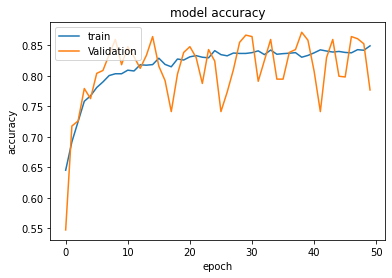

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

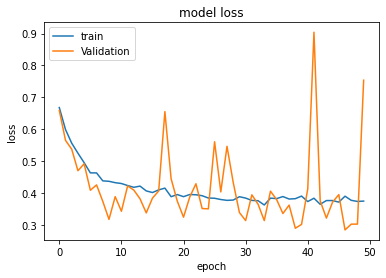

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
pip install google.colab

  Using cached google_colab-1.0.0-py2.py3-none-any.whl
  Using cached portpicker-1.2.0-py3-none-any.whl
  Using cached pandas-0.24.2.tar.gz (11.8 MB)
  Using cached notebook-5.2.2-py2.py3-none-any.whl (8.0 MB)
  Using cached ipython-5.5.0-py3-none-any.whl (758 kB)
  Using cached google_auth-1.4.2-py2.py3-none-any.whl (64 kB)
  Using cached requests-2.21.0-py2.py3-none-any.whl (57 kB)
  Using cached ipykernel-4.6.1-py3-none-any.whl (104 kB)
  Using cached simplegeneric-0.8.1-py3-none-any.whl
  Using cached prompt_toolkit-1.0.18-py3-none-any.whl (245 kB)
  Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl (26 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached nbconvert-6.5.0-py3-none-any.whl (561 kB)
  Using cached nbformat-5.4.0-py3-none-any.whl (73 kB)
  Using cached urllib3-1.24.3-py2.py3-none-any.whl (118 kB)
  Using cached idna-2.8-py2.py3-none-any.whl (58 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached MarkupSafe-2.1.1-cp39

  ERROR: Command errored out with exit status 1:
   command: 'e:\ppp\venv\Scripts\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Mahmoud Elwan\\AppData\\Local\\Temp\\pip-install-18m5f5rr\\pandas_de07b3c1df1f493da0f2beb685d067ad\\setup.py'"'"'; __file__='"'"'C:\\Users\\Mahmoud Elwan\\AppData\\Local\\Temp\\pip-install-18m5f5rr\\pandas_de07b3c1df1f493da0f2beb685d067ad\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Mahmoud Elwan\AppData\Local\Temp\pip-wheel-4kne616z'
       cwd: C:\Users\Mahmoud Elwan\AppData\Local\Temp\pip-install-18m5f5rr\pandas_de07b3c1df1f493da0f2beb685d067ad\
  Complete output (841 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating buil

In [ ]:
import os, sys
from os import listdir
import numpy as np
from keras.preprocessing import image

In [ ]:
import numpy as np
# from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

In [ ]:
import numpy as np
from keras.preprocessing import image
import imageio as iio
test_image = tf.keras.preprocessing.image.load_img('./content/drive/MyDrive/preprocessed_images/test/class0/img2.00.jpg', target_size = (150, 150))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
# training_set.class_indices
print(result[0][0])
if result[0][0] == 0:
  prediction = 'Normal'
else:
  prediction = 'Glaucoma'
print(prediction)

1/1 [==============================] - 0s 31ms/step
0.0
Normal


In [ ]:
test_image = tf.keras.preprocessing.image.load_img('./content/drive/MyDrive/preprocessed_images/test/class1/img1.00.jpg', target_size = (150, 150))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
# training_datagen.class_indices
print(result[0][0])
if result[0][0] == 0:
  prediction = 'Normal'
else:
  prediction = 'Glaucoma'
print(prediction)

1/1 [==============================] - 0s 61ms/step
1.368937e-13
Glaucoma


In [ ]:
import urllib.request
from PIL import Image
  
urllib.request.urlretrieve(
  'http://localhost:3000/uploads/glucomaImg/_incOP1DlhmOtVHbCxvIQ_278009919_532898738457411_1673914616059507264_n.jpg',
   "gfg.png")
  
img = Image.open("gfg.png")
print(img)
img.show()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=946x2048 at 0x1725D437EB0>


In [ ]:

imageUrl = 'http://localhost:3000/uploads/glucomaImg/_incOP1DlhmOtVHbCxvIQ_278009919_532898738457411_1673914616059507264_n.jpg'
def deploypredict(imageUrl):
  test_image = tf.keras.preprocessing.image.load_img(imageUrl, target_size = (150, 150))
  test_image = tf.keras.preprocessing.image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = model.predict(test_image)
  # training_datagen.class_indices
  if result[0][0] == 0:
    prediction = 'Normal'
  else:
    prediction = 'Glaucoma'
  print(prediction)
  return prediction


In [ ]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


In [ ]:
reconstructed_model =tf.keras.models.load_model("my_model")

In [ ]:
test_image = tf.keras.preprocessing.image.load_img('./content/drive/MyDrive/preprocessed_images/test/class1/img2.00.jpg', target_size = (150, 150))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = reconstructed_model.predict(test_image)
  # training_datagen.class_indices
if result[0][0] == 0:
    prediction = 'Normal'
else:
    prediction = 'Glaucoma'
print(prediction)
 



1/1 [==============================] - 0s 82ms/step
Glaucoma


In [ ]:
# pip install joblib

  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'e:\ppp\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
from joblib import dump, load

In [ ]:
dump(model , 'g.sav')

INFO:tensorflow:Assets written to: ram://06dfd519-6e77-47e5-88de-1ac707e10b58/assets


INFO:tensorflow:Assets written to: ram://06dfd519-6e77-47e5-88de-1ac707e10b58/assets


['g.sav']

In [ ]:
import pickle
pickle_out = open("galucoma58.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

INFO:tensorflow:Assets written to: ram://12dc2baa-64e3-438a-9113-78d9acfbeea0/assets


INFO:tensorflow:Assets written to: ram://12dc2baa-64e3-438a-9113-78d9acfbeea0/assets
